# Creating figure 1
This notebook generates figure 1 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape

In [43]:
# -*- coding: utf-8 -*-
import sys
import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
    r'\usepackage{textcomp}',
    r'\usepackage{siunitx}']

# plt.verbose.level = 'debug-annoying'
       
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}

lines = {'linewidth': 1}

plt.rc('font', **font)
plt.rc('lines', **lines)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)

In [15]:
a_pnp_zoom = AnalysisTools("fig_1_data/pnp_binary_zoom.h5")
a_knp_zoom = AnalysisTools("fig_1_data/knp_binary_zoom.h5")

a_pnp_long = AnalysisTools("fig_1_data/pnp_binary_long.h5")
a_knp_long = AnalysisTools("fig_1_data/knp_binary_long.h5")

a_nofield = AnalysisTools("fig_1_data/nofield_binary_long.h5")
a_mod_diff = AnalysisTools("fig_1_data/diffusion_x_binary_long.h5")

IOError: unable to open file (File accessibilty: Unable to open file)

In [16]:
phi_pnp_zoom, t_pnp_zoom = a_pnp_zoom.make_potential_difference_time_course(0, 1000)
phi_knp_zoom, t_knp_zoom = a_knp_zoom.make_potential_difference_time_course(0, 1000)

0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900


In [4]:
phi_pnp_long, t_pnp_long = a_pnp_long.make_potential_difference_time_course(0, 1000)
phi_knp_long, t_knp_long = a_knp_long.make_potential_difference_time_course(0, 1000)

0
100
200
300
400
500
600
700
800
900
0
100
200
300
400
500
600
700
800
900


<IPython.core.display.Javascript object>


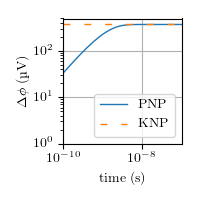

In [44]:
n_end = 1000

t_pnp = t_pnp_zoom[1:n_end]
t_knp = t_knp_zoom[1:n_end]
phi_pnp = phi_pnp_zoom[1:n_end]
phi_knp = phi_knp_zoom[1:n_end]

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(111)

plt.plot(np.array(t_pnp),1e6*np.array(phi_pnp), label='PNP')
plt.plot(np.array(t_knp),1e6*np.array(phi_knp), '--',label = 'KNP', dashes=(5,10))
ax.set_ylabel(r"$\Delta\phi$ (\textmu V)")
ax.set_xlabel("time (s)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([1, 500])
ax.set_xlim([1e-10, 1e-7])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.savefig('pot_zoom.pdf')
plt.show()

<IPython.core.display.Javascript object>


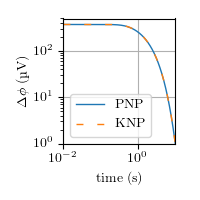

In [39]:
t_pnp = t_pnp_long[1:n_end]
t_knp = t_knp_long[1:n_end]
phi_pnp = phi_pnp_long[1:n_end]
phi_knp = phi_knp_long[1:n_end]

fig = plt.figure(figsize=(2,2))
ax = fig.add_subplot(111)

plt.plot(np.array(t_pnp),1e6*np.array(phi_pnp), label='PNP')
plt.plot(np.array(t_knp),1e6*np.array(phi_knp), '--',label = 'KNP', dashes=(5,10))
ax.set_ylabel(r"$\Delta\phi$ (\textmu V)")
ax.set_xlabel("time (s)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([1, 500])
ax.set_xlim([1e-2, 1e1])
plt.legend(loc='lower left')
plt.grid()

plt.tight_layout()
plt.savefig('pot_long.pdf')
plt.show()

<IPython.core.display.Javascript object>


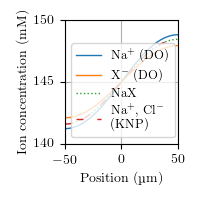

In [61]:
fig, ax = plt.subplots(figsize=(2,2))
coor = a_nofield.mesh.coordinates()

t_idx = 100

u = Function(a_nofield.W)
a_nofield.hdf.read(u, '/solution/vector_'+str(t_idx))

c_na = Function(a_nofield.V)
c_na.assign(project(u.sub(0), a_nofield.V))
c_na_array = c_na.vector().array()
c_na_array = c_na_array[a_nofield.vertex_to_dof_map]

c_x = Function(a_nofield.V)
c_x.assign(project(u.sub(1), a_nofield.V))
c_x_array = c_x.vector().array()
c_x_array = c_x_array[a_nofield.vertex_to_dof_map]

ax.plot((coor - 50e-6)*1e6, c_na_array, label=r'Na$^{+}$ (DO)')
ax.plot((coor - 50e-6)*1e6, c_x_array, label=r'X$^{-}$ (DO)')


u = Function(a_mod_diff.W)
a_mod_diff.hdf.read(u, '/solution/vector_'+str(t_idx))

c_nax = Function(a_mod_diff.V)
c_nax.assign(project(u.sub(0), a_mod_diff.V))
c_nax_array = c_nax.vector().array()
c_nax_array = c_nax_array[a_mod_diff.vertex_to_dof_map]
ax.plot((coor - 50e-6)*1e6, c_nax_array, ':', label=r'NaX')

u = Function(a_knp_long.W)
a_knp_long.hdf.read(u, '/solution/vector_'+str(t_idx))

c_na_knp = Function(a_knp_long.V)
c_na_knp.assign(project(u.sub(0), a_knp_long.V))
c_na_knp_array = c_na_knp.vector().array()
c_na_knp_array = c_na_knp_array[a_knp_long.vertex_to_dof_map]

ax.plot((coor - 50e-6)*1e6, c_na_knp_array, '--', label='Na$^{+}$, Cl$^-$\n (KNP)', dashes=(5,10))
# plt.legend(bbox_to_anchor=(0., 0.8, 1., 1.14), loc=3,
#            ncol=2, mode="expand", borderaxespad=0.)
ax.set_xlim([-50, 50])
ax.set_ylim([140, 150])
plt.yticks([140, 145, 150])
plt.xticks([-50, 0, 50])
plt.legend(fontsize=9)
ax.set_xlabel(r"Position (\textmu m)")
ax.set_ylabel('Ion concentration (mM)')
plt.grid()
plt.tight_layout()
plt.savefig('diffusion.pdf')
plt.show()